In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plot
from sklearn import metrics
from statsmodels import api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

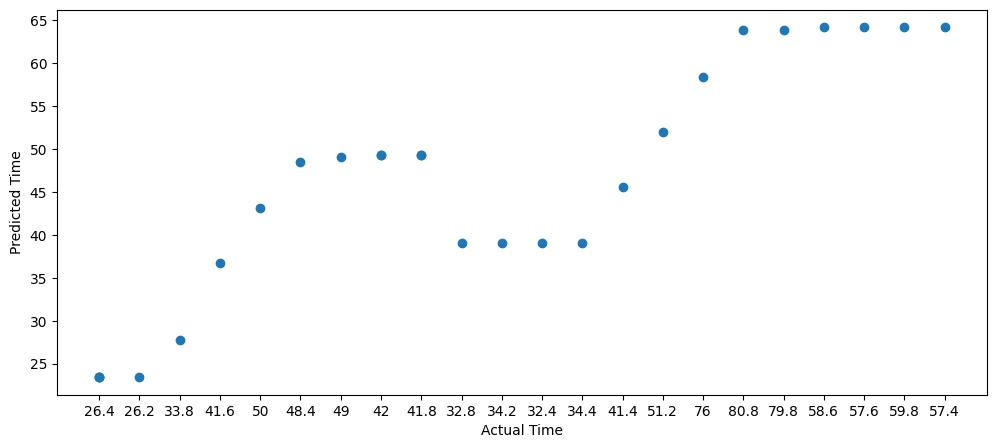

In [31]:
headers = [
    "os_type",
    "data_bytes",
    "time"
]

dataset = pd.read_csv("act4.csv", header=None, names=headers)
dataset.drop(index=dataset.index[0], axis="index", inplace=True)
dataset["os_type"] = dataset["os_type"].astype("category").cat.codes
dataset.astype(float)

feature_var = dataset.drop(columns="time")  # X
dep_var = dataset["time"]  # Y

model = LinearRegression()
model.fit(feature_var, dep_var)

dep_predict = model.predict(feature_var)

plot.figure(figsize=(12, 5))
plot.scatter(dep_var, dep_predict)
plot.xlabel("Actual Time")
plot.ylabel("Predicted Time")
plot.savefig("scatterplot.png")

r2_score = metrics.r2_score(dep_var, dep_predict)
with open("summary.txt", "w") as file:
    file.write(str(float(r2_score)))

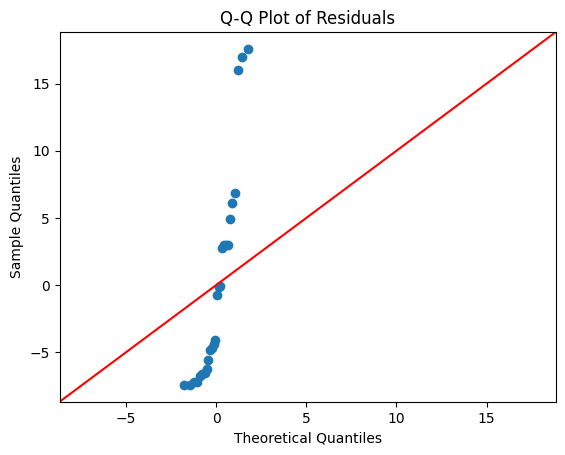

In [32]:

coeff = model.coef_
intercept = model.intercept_

dep_var = dep_var.astype(float)

residuals = dep_var.sub(dep_predict)

sm.qqplot(residuals, line="45")
plot.title("Q-Q Plot of Residuals")
plot.savefig("qqplot_residuals.png")


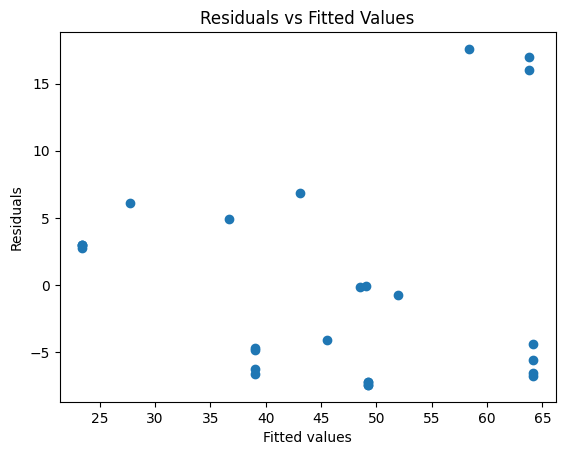

In [33]:

plot.scatter(dep_predict, residuals)
plot.xlabel("Fitted values")
plot.ylabel("Residuals")
plot.title("Residuals vs Fitted Values")
plot.savefig("homoscedasticity.png")

In [34]:
vif = pd.DataFrame()
vif["feature"] = feature_var.columns

vif["vif"] = [
    variance_inflation_factor(
        feature_var.astype(float).values,
        i
    ) for i in range(feature_var.shape[1])
]
print(f"VIF: {vif}")
with open("vif.txt", "w") as f:
    f.write(str(vif))

VIF:       feature       vif
0     os_type  1.495239
1  data_bytes  1.495239


In [57]:
# feature_var = sm.add_constant(feature_var)

# x = feature_var.astype(float).to_numpy()
# y = dep_var.to_numpy()

# print(x)
# print(y)

# model = sm.OLS(x, y).fit()

# test_matrix = np.zeros((1, x.shape[1]))
# test_matrix[0, 0] = 1  # Testing the intercept

# print(f"OLS: {model.t_test(test_matrix)}")
# with open("coefficients.txt", "w") as f:
#     f.write(str(model.t_test(test_matrix)))

[[1.000e+00 1.000e+00 6.400e+01]
 [1.000e+00 1.000e+00 6.400e+01]
 [1.000e+00 1.000e+00 6.400e+01]
 [1.000e+00 1.000e+00 6.400e+01]
 [1.000e+00 1.000e+00 2.340e+02]
 [1.000e+00 1.000e+00 5.900e+02]
 [1.000e+00 1.000e+00 8.460e+02]
 [1.000e+00 1.000e+00 1.060e+03]
 [1.000e+00 1.000e+00 1.082e+03]
 [1.000e+00 1.000e+00 1.088e+03]
 [1.000e+00 1.000e+00 1.088e+03]
 [1.000e+00 1.000e+00 1.088e+03]
 [1.000e+00 1.000e+00 1.088e+03]
 [1.000e+00 0.000e+00 9.200e+01]
 [1.000e+00 0.000e+00 9.200e+01]
 [1.000e+00 0.000e+00 9.200e+01]
 [1.000e+00 0.000e+00 9.200e+01]
 [1.000e+00 0.000e+00 3.480e+02]
 [1.000e+00 0.000e+00 6.040e+02]
 [1.000e+00 0.000e+00 8.600e+02]
 [1.000e+00 0.000e+00 1.074e+03]
 [1.000e+00 0.000e+00 1.074e+03]
 [1.000e+00 0.000e+00 1.088e+03]
 [1.000e+00 0.000e+00 1.088e+03]
 [1.000e+00 0.000e+00 1.088e+03]
 [1.000e+00 0.000e+00 1.088e+03]]
[26.4 26.4 26.4 26.2 33.8 41.6 50.  48.4 49.  42.  41.8 41.8 42.  32.8
 34.2 32.4 34.4 41.4 51.2 76.  80.8 79.8 58.6 57.6 59.8 57.4]


ValueError: wrong shape for coefs